In [4]:
import numpy as np
import matplotlib.pyplot as plt
from MABP import MultiArmedBanditEnv, QLearningAgent

In [5]:
def run_simulation_with_qlearning(cooperation_strategies, num_agents=10, num_episodes=1000, num_trials=10, history_length=5):
    for red_coop, blue_coop in cooperation_strategies:
        env = MultiArmedBanditEnv(num_agents=num_agents, history_length=history_length)
        agent = QLearningAgent(num_agents=num_agents, red_coop_prob=red_coop, blue_coop_prob=blue_coop, history_length=history_length)

        for episode in range(num_episodes):
            state = env.reset()
            total_reward = 0

            for trial in range(num_trials):
                actions = agent.choose_action(state)
                next_state, rewards, done, _ = env.step(actions)
                reward = np.mean(rewards)
                agent.update_q_table(state, actions, reward, next_state)
                state = next_state
                total_reward += reward

            agent.decay_epsilon()
            if episode % 100 == 0:
                print(f"Episode {episode}, Total Reward: {total_reward}")

        plot_results_with_qlearning(agent, red_coop, blue_coop)

def plot_results_with_qlearning(agent, red_coop, blue_coop):
    red_rewards = np.mean(agent.q_table[:, :2 ** (agent.num_agents // 2)], axis=0)
    blue_rewards = np.mean(agent.q_table[:, 2 ** (agent.num_agents // 2):], axis=0)

    plt.figure()
    plt.boxplot([red_rewards, blue_rewards], labels=['Red', 'Blue'])
    plt.title(f'Average Rewards (Red Coop: {red_coop}, Blue Coop: {blue_coop})')
    plt.ylabel('Average Reward')
    plt.show()


Episode 0, Total Reward: 42.8
Episode 100, Total Reward: 34.0
Episode 200, Total Reward: 32.400000000000006
Episode 300, Total Reward: 28.4
Episode 400, Total Reward: 40.400000000000006
Episode 500, Total Reward: 37.2
Episode 600, Total Reward: 39.6
Episode 700, Total Reward: 38.0
Episode 800, Total Reward: 41.199999999999996
Episode 900, Total Reward: 38.0


/var/folders/9t/k0wdgts94xxd3z4rwr3szc1m0000gn/T/ipykernel_80099/297476966.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([red_rewards, blue_rewards], labels=['Red', 'Blue'])


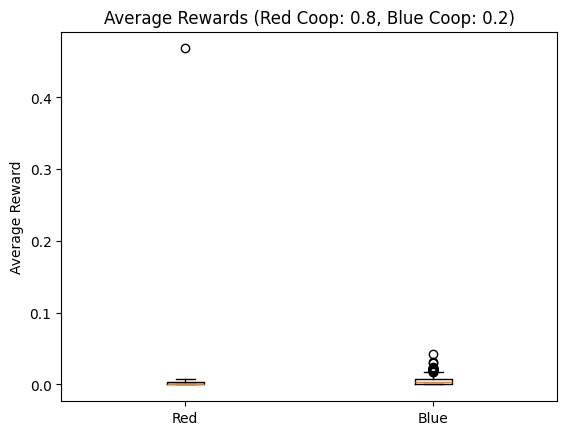

Episode 0, Total Reward: 38.8
Episode 100, Total Reward: 34.0
Episode 200, Total Reward: 34.8
Episode 300, Total Reward: 38.8
Episode 400, Total Reward: 41.2
Episode 500, Total Reward: 44.4
Episode 600, Total Reward: 41.2
Episode 700, Total Reward: 41.199999999999996
Episode 800, Total Reward: 34.8
Episode 900, Total Reward: 38.0


/var/folders/9t/k0wdgts94xxd3z4rwr3szc1m0000gn/T/ipykernel_80099/297476966.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([red_rewards, blue_rewards], labels=['Red', 'Blue'])


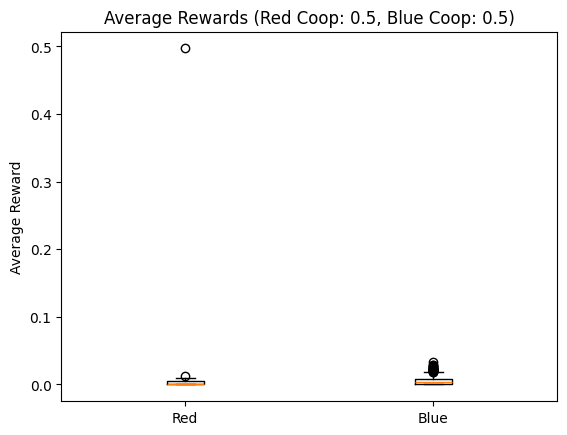

Episode 0, Total Reward: 44.400000000000006
Episode 100, Total Reward: 35.6
Episode 200, Total Reward: 39.6
Episode 300, Total Reward: 33.2
Episode 400, Total Reward: 30.0
Episode 500, Total Reward: 40.400000000000006
Episode 600, Total Reward: 44.4
Episode 700, Total Reward: 26.799999999999997
Episode 800, Total Reward: 37.2
Episode 900, Total Reward: 36.4


/var/folders/9t/k0wdgts94xxd3z4rwr3szc1m0000gn/T/ipykernel_80099/297476966.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([red_rewards, blue_rewards], labels=['Red', 'Blue'])


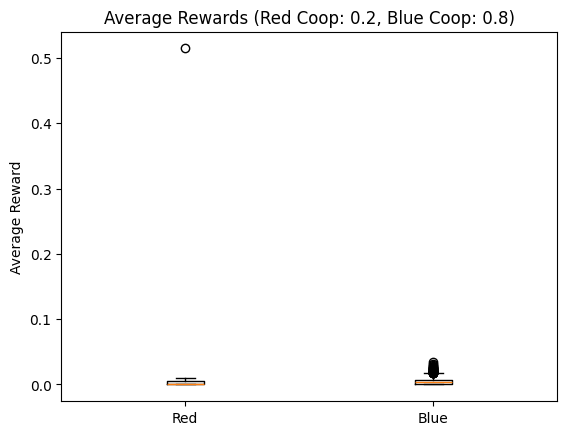

Episode 0, Total Reward: 40.4
Episode 100, Total Reward: 30.799999999999997
Episode 200, Total Reward: 33.199999999999996
Episode 300, Total Reward: 36.4
Episode 400, Total Reward: 36.4
Episode 500, Total Reward: 32.4
Episode 600, Total Reward: 34.8
Episode 700, Total Reward: 33.2
Episode 800, Total Reward: 36.400000000000006
Episode 900, Total Reward: 25.2


/var/folders/9t/k0wdgts94xxd3z4rwr3szc1m0000gn/T/ipykernel_80099/297476966.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([red_rewards, blue_rewards], labels=['Red', 'Blue'])


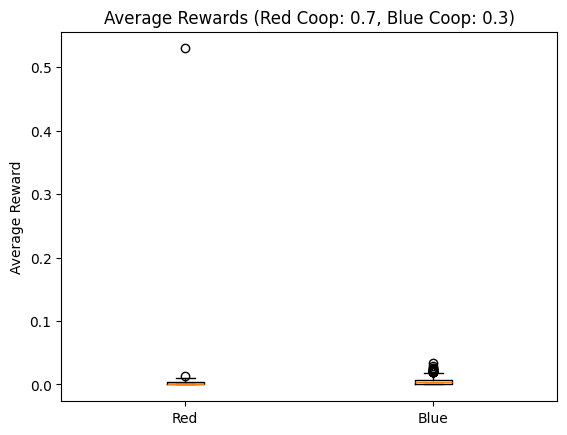

Episode 0, Total Reward: 39.6
Episode 100, Total Reward: 25.2
Episode 200, Total Reward: 40.400000000000006
Episode 300, Total Reward: 41.2
Episode 400, Total Reward: 36.4
Episode 500, Total Reward: 35.6
Episode 600, Total Reward: 29.2
Episode 700, Total Reward: 33.199999999999996
Episode 800, Total Reward: 40.4
Episode 900, Total Reward: 38.0


/var/folders/9t/k0wdgts94xxd3z4rwr3szc1m0000gn/T/ipykernel_80099/297476966.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([red_rewards, blue_rewards], labels=['Red', 'Blue'])


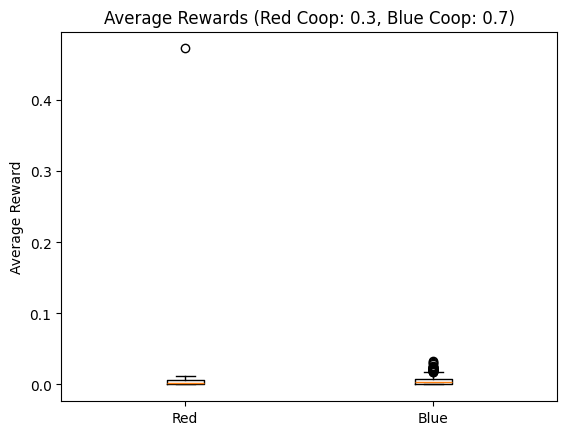

In [7]:
cooperation_strategies = [
    (0.8, 0.2),  # High cooperation for red, low for blue
    (0.5, 0.5),  # Equal cooperation
    (0.2, 0.8),  # Low cooperation for red, high for blue
    (0.7, 0.3),  # Moderately high cooperation for red, moderately low for blue
    (0.3, 0.7),  # Moderately low cooperation for red, moderately high for blue
]

run_simulation_with_qlearning(cooperation_strategies)